#### **This notebook explores the following problem:**
- Problem: All the edges of the network are significant.
- Possible Reason: The minimum similarity value being considered is high.
- Solution: Lets decrease it to 0.5 and test.

In [1]:
#### Check distribution of the pvalue
#### Check cosine similarity associated with the pvalue
#### Checks if all the edges are significant even when the minimum cosine similarity is set to 0.5

#### **Conclusion**

- Decreasing minimum cosine similarity has effect on some of the indicators, but not all of them.
- Cosine similarity and value should be negatively correlated, but the correlation is very low.

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
folder = '/N/slate/potem/project/coordinationz/Outputs/Tables'

In [4]:
def load_file(folder, file):
    file_path = os.path.join(folder, file)
    
    return pd.read_csv(file_path)
    

In [5]:
def plot_histogram(parameters):
    '''
    Plots histogram
    :param parameters: parameters for the plot
    '''
       
    # parameters =  {
    #     'data': df,
    #     'fontsize': 14,
    #     'columns': [
    #         {'column': 'count',
    #          'label': 'Count of Replies',
    #         }
    #     ],
    #     'xlabel': '',
    #     'ylabel': '',
    #     'legend_location': '',
    #     'log_yscale': True,
    #     'log_xscale': True,
    #     'bins': 60,
    #     'save': {
    #         'path': '',
    #         'filename': ''
    #     },
    #     'title': ''
    # }
    
    
    num_bins = parameters['bins']
    column = parameters['columns'][0]['column']
    df = parameters['data'][0]
    
    if 'size' in parameters:
        size = parameters['size']
    else:
        size = (10,10)
    
    if 'fontsize' in parameters:
        fontsize = parameters['fontsize']
    else:
        fontsize = 14
    
    if parameters['bins'] == None:
        num_bins = df[column].nunique()
        
    if parameters['log_xscale'] == True:
        num_bins=np.logspace(start=np.log10(min(df[column])), 
                             stop=np.log10(max(df[column])),
                             num=num_bins
                            )
        
    fig, ax = plt.subplots(figsize=size)
    
    for index, df in enumerate(parameters['data']):
        n = ax.hist(df[parameters['columns'][index]['column']],
                    bins=num_bins, 
                    density=parameters['density'], #True,
                    label= parameters['columns'][index]['label'],
                    alpha=0.5
                   )
    ax.set_xlabel(parameters['xlabel'],
                  fontsize=fontsize
                 )
    ax.set_ylabel(parameters['ylabel'],
                  fontsize=fontsize
                 )
    
    if parameters['log_yscale'] == True:
        plt.yscale('log')
    if parameters['log_xscale'] == True:
        plt.xscale('log')
        
    if 'text' in parameters:
        x_loc = parameters['x_loc']
        y_loc = parameters['y_loc']
        text = parameters['text']
        
        plt.text(x_loc, y_loc, 
                 text, 
                 fontsize=fontsize,
                 color='blue', 
                 ha='center')

    if 'title' in parameters:
        plt.title(parameters['title'],
                  fontsize=fontsize
                 )
    if 'fontsize_xticks' in parameters:
        plt.xticks(fontsize=parameters['fontsize_xticks'])
    else:
        plt.xticks(fontsize=fontsize)
        
    if 'fontsize_yticks' in parameters:
        plt.yticks(fontsize=parameters['fontsize_yticks'])
    else:
        plt.yticks(fontsize=fontsize)

    if 'legend_location' in parameters:
        ax.legend(loc=parameters['legend_location'], 
                  frameon=True, fontsize=fontsize)

    fig.tight_layout()
    
    if 'save' in parameters:
        plot_path = parameters['save']['path']
        title = parameters['save']['filename']

        path = os.path.join(plot_path, title)
        fig.savefig(f'{path}', 
                  facecolor='white', 
                  transparent=False)
    plt.show()




def scatter_plot(parameters):
    '''
    Plots the scatterplot
    
    :param parameters: parameters for the plot
    '''
    
    # parameters =  {
    #     'data': df_jaccard,
    #     'fontsize': 14,
    #     'columns': {
    #         'x': 'ratio',
    #         'y': 'count_total_replies',
    #     },
    #     'alpha': 0.5,
    #     'marker_size': 5,
    #     'marker': None,
    #     'xlabel': 'Jaccard coefficent \n (for each IO account, each poster)',
    #     'ylabel': 'Number of daily tweets from poster  ',
    #     'legend_location': '',
    #     'log_yscale': False,
    #     'log_xscale': False,
    #     'bins': None,
    #     'title': f'{year}_{campaign}_per_poster_per_tweet_1day',
    #     'save': {
    #         'path': f'{time_plot_path}',
    #         'filename': f'{year}_{campaign}_jaccard_1day.png'
    #     },
    # }
    
    keys = parameters.keys()
    
    if 'size' in keys:
        size = parameters['size']
    else:
        size = (8,8)
        
    fig, ax = plt.subplots(figsize=size)
    fontsize = parameters['fontsize']
    
    colors = ['blue', 'red', 'green', 'orange', 'olive', 'pink', 'lime', 'maroon']
    symbols = ['.', 'o', '+', 'x', '*', 'v', '^', '>']
    
    x_column = parameters['columns']['x']
    y_column = parameters['columns']['y']
    data = parameters['data']
    color = colors[0]
    
    alpha = parameters['alpha'] if 'alpha' in keys else 0.5
    marker_size = parameters['marker_size'] if 'marker_size' in keys else 3
    
    if 'marker' in keys:
        marker = symbols[1]
    else:
        marker = symbols[0]

    ax.scatter(data[x_column], 
               data[y_column], 
               marker_size, 
               c=color, 
               alpha=alpha, 
               marker=marker,
              )
    
    ax.set_xlabel(parameters['xlabel'], 
                  fontsize=fontsize)
    ax.set_ylabel(parameters['ylabel'], 
                  fontsize=fontsize)

    ax.tick_params(axis='both', labelsize=fontsize) 
    
    if 'log_yscale' in keys and parameters['log_yscale'] == True:
        ax.set_yscale('log')
    if 'log_xscale' in keys and parameters['log_xscale'] == True:
        ax.set_xscale('log')

    if 'legend_location' in keys:
        ax.legend(loc=parameters['legend_location'], 
                  frameon=True, fontsize=fontsize)
        
    if 'title' in keys:
        plt.title(parameters['title'])

    if 'change_tick' in keys and parameters['change_tick'] == True:
        plt.xticks(np.arange(data[x_column].min(),
                             data[x_column].max(), 
                             1)
                  )

        
    fig.tight_layout()
    
    if 'save' in keys:
        path = parameters['save']['path']
        filename = parameters['save']['filename']
        
        file_path = os.path.join(path, filename)
        
        fig.savefig(f'{file_path}', 
              facecolor='white', 
              transparent=False)
        
    plt.show()

In [6]:
parameters =  {
        'data': None,
        'fontsize': 14,
        'columns': [
            {'column': '',
             'label': '',
            }
        ],
        'xlabel': 'P-value',
        'ylabel': 'Count',
        # 'legend_location': '',
        'density': False,
        'log_yscale': True,
        'log_xscale': False,
        'bins': None,
        'save': {
            'path': './plots',
            'filename': ''
        },
        'title': ''
    }

#### **Armenia: Null**

In [7]:
file = 'armenia_202012_tweets_softunion_null_merged_edges_1.csv'

In [8]:
df_armenia = load_file(folder, file)

In [9]:
df_armenia.columns

Index(['source_id', 'target_id', 'pvalue', 'similarity', 'Type', 'weight'], dtype='object')

In [10]:
df_armenia.head()

,source_id,target_id,pvalue,similarity,Type,weight
0,2323605114,725365600927752192,0.053524,0.743879,cohashtag,0.946476
1,725365600927752192,2711762995,0.000025,0.914208,cohashtag-coword,0.999975
2,725365600927752192,2884944579,0.044324,0.923505,cohashtag-coword,0.955676
3,725365600927752192,719246221509005313,0.998350,0.762059,cohashtag,0.001650
4,725365600927752192,111305865,0.981100,0.895774,coword,0.018900


In [11]:
df_armenia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   source_id   451 non-null    int64  
 1   target_id   451 non-null    int64  
 2   pvalue      451 non-null    float64
 3   similarity  451 non-null    float64
 4   Type        451 non-null    object 
 5   weight      451 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 21.3+ KB


In [12]:
df_armenia['pvalue'].max()

np.float64(0.9983500412489688)

In [13]:
df_armenia['pvalue'].min()

np.float64(1.5623828183591307e-14)

In [14]:
parameters['data'] = [df_armenia]
parameters['columns'][0]['column'] = 'pvalue'
parameters['bins'] = np.arange(0,1,0.1).tolist()
parameters['save']['filename'] = 'armenia_all_edges.png'

In [15]:
plot_histogram(parameters)

In [16]:
import matplotlib.pyplot as plt

#### **UAE: All merged edges**

In [19]:
filename = 'uae_082019_1_tweets_softunion_null_manita_merged_edges_1.csv'

In [20]:
df_uae = load_file('./data', filename)

In [21]:
len(df_uae)

223856

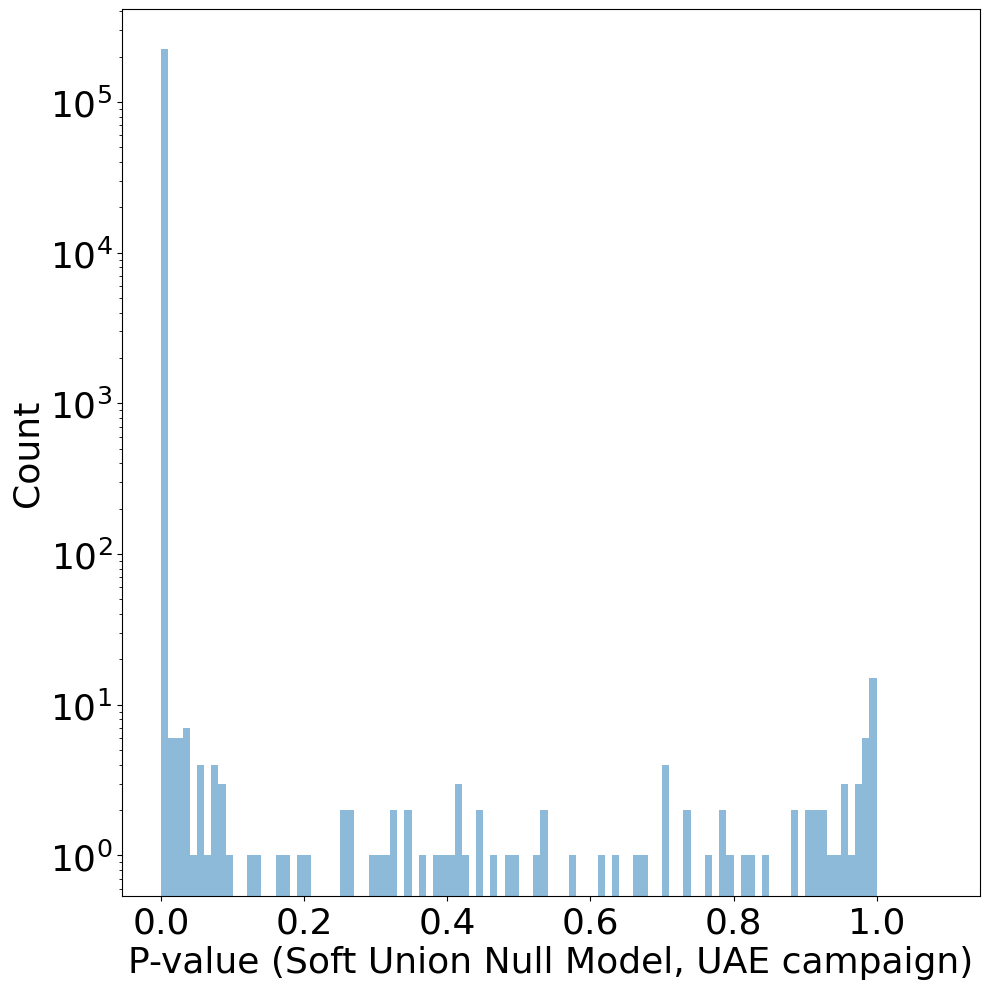

In [22]:
parameters =  {
        'data': None,
        'fontsize': 26,
        'columns': [
            {'column': '',
             'label': '',
            }
        ],
        'xlabel': 'P-value (Soft Union Null Model, UAE campaign)',
        'ylabel': 'Count',
        # 'legend_location': '',
        'density': False,
        'log_yscale': True,
        'log_xscale': False,
        'bins': None,
        'save': {
            'path': './plots',
            'filename': ''
        },
        'title': ''
    }

parameters['data'] = [df_uae]
parameters['columns'][0]['column'] = 'pvalue'

parameters['bins'] = np.arange(0,1.1,0.01).tolist()
parameters['save']['filename'] = 'uae_all_edges.png'

plot_histogram(parameters)

#### **UAE: Co-URL**

In [23]:
from xnetwork import load
import coordinationz.cohashtag_helper as cohp

/N/slate/potem/project/coordinationz/source/coordinationz/config.py:31: UserWarning: Config file not found: None
  warnings.warn(str(e))
/N/slate/potem/project/coordinationz/source/coordinationz/config.py:32: UserWarning: Tried to find config.toml in this directory, and parent directories.
  warnings.warn("Tried to find config.toml in this directory, and parent directories.")
/N/slate/potem/project/coordinationz/source/coordinationz/config.py:33: UserWarning: Please create a config.toml file with the necessary settings.
  warnings.warn("Please create a config.toml file with the necessary settings.")
/N/slate/potem/project/coordinationz/source/coordinationz/config.py:34: UserWarning: Or manually call coordinationz.load_config('path/to/config.toml') in your code.
  warnings.warn("Or manually call coordinationz.load_config('path/to/config.toml') in your code.")
/N/slate/potem/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter a

In [24]:
import networkx as nx

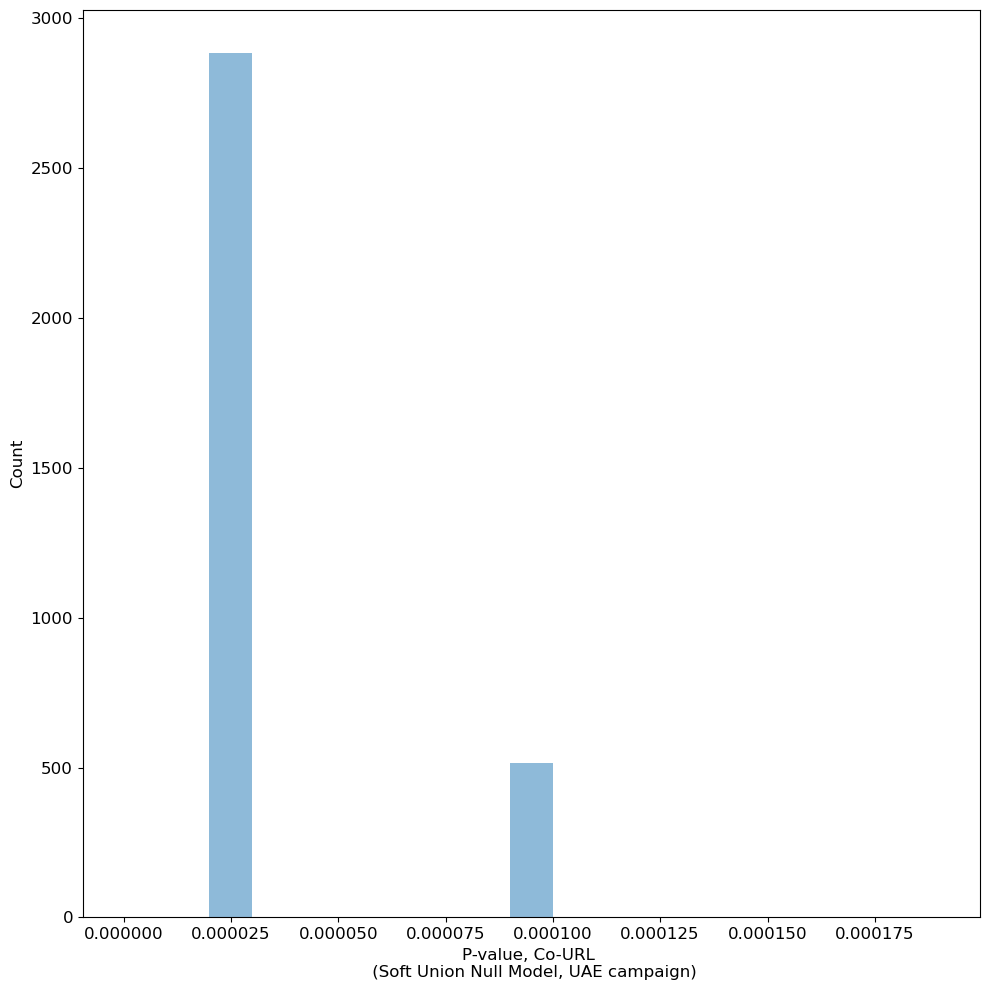

In [25]:
uae_url = './data/uae_082019_1_tweets_softunion_null_manita_courl.xnet'
G_xnet = load(uae_url)
    
G = G_xnet.to_networkx()

for node, attrs in G.nodes(data=True):
    if '_igraph_index' in attrs:
        del attrs['_igraph_index']

for u, v, attrs in G.edges(data=True):
    if '_igraph_index' in attrs:
        del attrs['_igraph_index']
        
all_edges = []
for u, v, attrs in G.edges(data=True):
    all_edges.append([u, v, attrs['weight'], attrs['pvalue']])

df_edges_uae_courl = pd.DataFrame(data = all_edges,
                                  columns = ['source', 'target', 'weight', 'pvalue']
                                 )

parameters =  {
        'data': None,
        'fontsize': 12,
        'columns': [
            {'column': '',
             'label': '',
            }
        ],
        'xlabel': 'P-value, Co-URL \n (Soft Union Null Model, UAE campaign)',
        'ylabel': 'Count',
        # 'legend_location': '',
        'density': False,
        'log_yscale': False,
        'log_xscale': False,
        'bins': None,
        'save': {
            'path': './plots',
            'filename': ''
        },
        'title': ''
    }

parameters['data'] = [df_edges_uae_courl]
parameters['columns'][0]['column'] = 'pvalue'

parameters['bins'] = np.arange(0, max(df_edges_uae_courl['pvalue'])+0.0001, 0.00001).tolist()
parameters['save']['filename'] = 'uae_courl_edges.png'

plot_histogram(parameters)

In [27]:
import scipy.stats as stats

In [28]:
correlation, p_value = stats.pearsonr(df_edges_uae_courl['weight'], df_edges_uae_courl['pvalue'])
print(correlation, p_value)

0.38530033357116517 9.36091106643751e-121


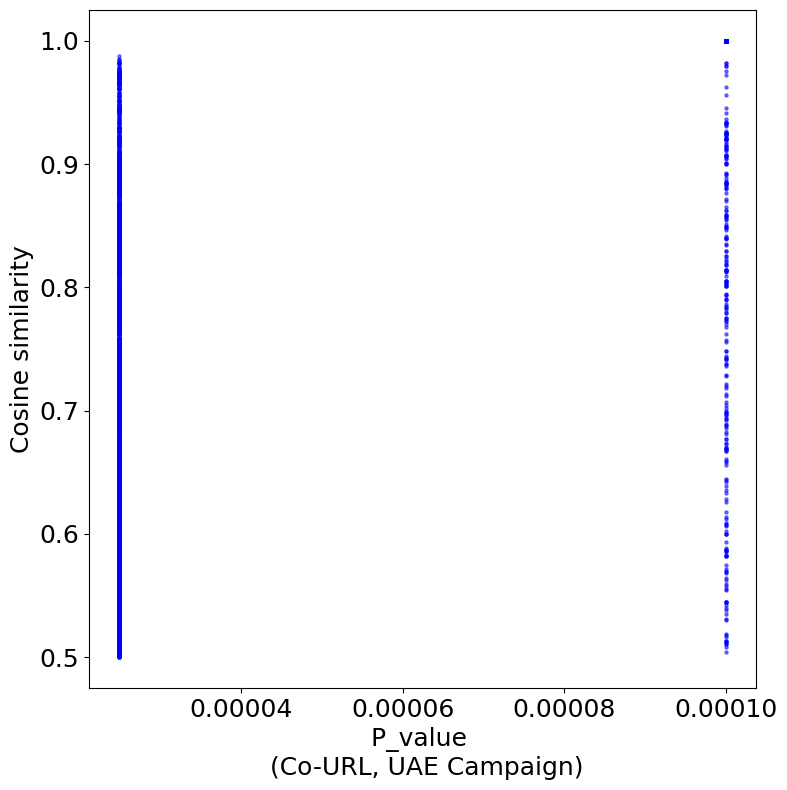

In [29]:
scatter_parameters =  {
        'data': df_edges_uae_courl,
        'fontsize': 18,
        'columns': {
            'x': 'pvalue',
            'y': 'weight',
        },
        'alpha': 0.5,
        'marker_size': 5,
        'marker': None,
        'xlabel': 'P_value \n (Co-URL, UAE Campaign)',
        'ylabel': 'Cosine similarity',
        # 'legend_location': '',
        'log_yscale': False,
        'log_xscale': False,
        'bins': None,
        # 'title': f'{year}_{campaign}_per_poster_per_tweet_1day',
        'save': {
            'path': f'./data',
            'filename': f'uae_pvalue_vs_cosine_courl.png'
        },
    }


scatter_plot(scatter_parameters)

#### **UAE: Co-hashtag**

In [30]:
uae_hashtag = './data/uae_082019_1_tweets_softunion_null_manita_cohashtag.xnet'
tag = 'Co-hashtag'
G_xnet = load(uae_hashtag)
    
G = G_xnet.to_networkx()

for node, attrs in G.nodes(data=True):
    if '_igraph_index' in attrs:
        del attrs['_igraph_index']

for u, v, attrs in G.edges(data=True):
    if '_igraph_index' in attrs:
        del attrs['_igraph_index']
        
all_edges = []
for u, v, attrs in G.edges(data=True):
    # print(attrs)
    all_edges.append([u, v, attrs['weight'], attrs['pvalue']])

df_edges_uae_cohashtag = pd.DataFrame(data = all_edges,
                                  columns = ['source', 'target', 'weight', 'pvalue']
                                 )

In [31]:
df_edges_uae_cohashtag['pvalue'].max()

np.float64(1.0)

In [32]:
df_edges_uae_cohashtag['pvalue'].min()

np.float64(2.499937501562461e-05)

In [33]:
correlation, p_value = stats.pearsonr(df_edges_uae_cohashtag['weight'], 
                                      df_edges_uae_cohashtag['pvalue']
                                     )
print(correlation, p_value)

-0.02038367339219556 4.517573763712793e-14


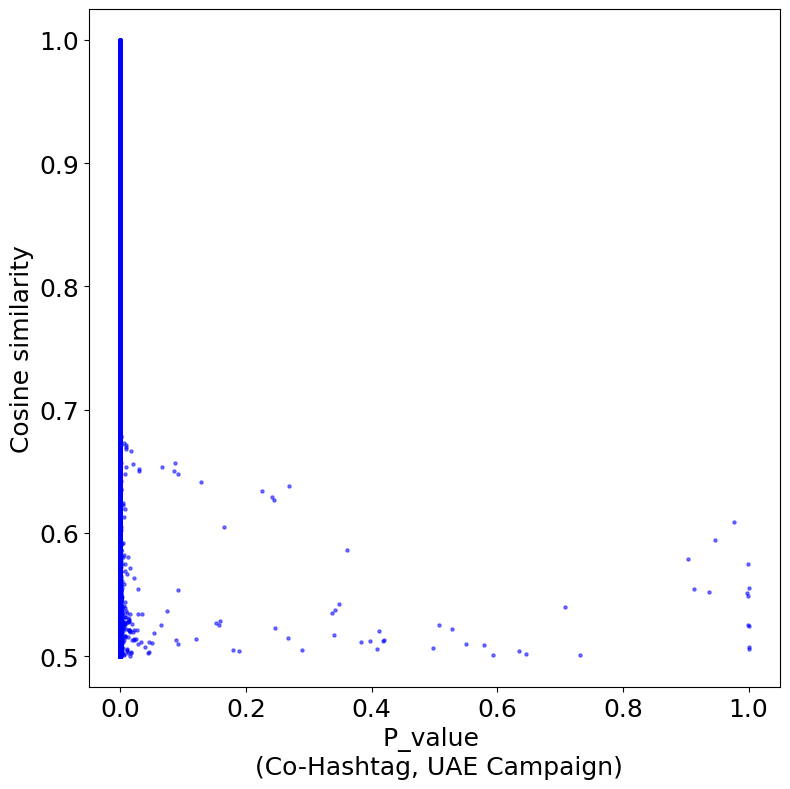

In [34]:
scatter_parameters =  {
        'data': df_edges_uae_cohashtag,
        'fontsize': 18,
        'columns': {
            'x': 'pvalue',
            'y': 'weight',
        },
        'alpha': 0.5,
        'marker_size': 5,
        'marker': None,
        'xlabel': 'P_value \n (Co-Hashtag, UAE Campaign)',
        'ylabel': 'Cosine similarity',
        # 'legend_location': '',
        'log_yscale': False,
        'log_xscale': False,
        'bins': None,
        # 'title': f'{year}_{campaign}_per_poster_per_tweet_1day',
        'save': {
            'path': f'./data',
            'filename': f'uae_pvalue_vs_cosine_cohashtag.png'
        },
    }


scatter_plot(scatter_parameters)

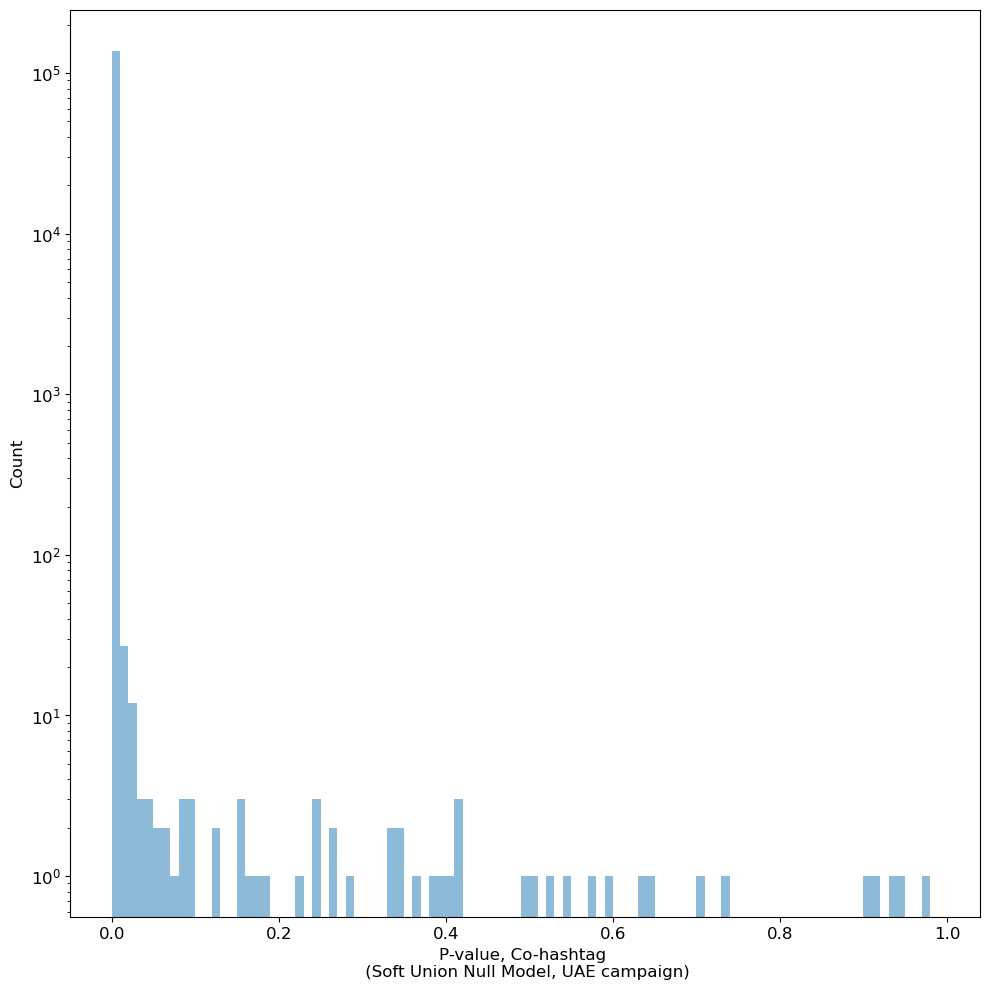

In [35]:
parameters =  {
        'data': None,
        'fontsize': 12,
        'columns': [
            {'column': '',
             'label': '',
            }
        ],
        'xlabel': f'P-value, {tag} \n (Soft Union Null Model, UAE campaign)',
        'ylabel': 'Count',
        # 'legend_location': '',
        'density': False,
        'log_yscale': True,
        'log_xscale': False,
        'bins': None,
        'save': {
            'path': './plots',
            'filename': ''
        },
        'title': ''
    }

parameters['data'] = [df_edges_uae_cohashtag]
parameters['columns'][0]['column'] = 'pvalue'
# max(df_edges_uae_cohashtag['pvalue'])+0.0001
# print(parameters['data'][0][parameters['columns'][0]['column']])
parameters['bins'] = np.arange(0,
                               1,
                               0.01
                              ).tolist()
parameters['save']['filename'] = f'uae_cohashtag_edges.png'

plot_histogram(parameters)

#### **UAE: Co-Retweet**

In [36]:
uae_coretweet = './data/uae_082019_1_tweets_softunion_null_manita_coretweet.xnet'
tag = 'Co-Retweet'
G_xnet = load(uae_coretweet)
    
G = G_xnet.to_networkx()

for node, attrs in G.nodes(data=True):
    if '_igraph_index' in attrs:
        del attrs['_igraph_index']

for u, v, attrs in G.edges(data=True):
    if '_igraph_index' in attrs:
        del attrs['_igraph_index']
        
all_edges = []
for u, v, attrs in G.edges(data=True):
    # print(attrs)
    all_edges.append([u, v, attrs['weight'], attrs['pvalue']])

df_edges_uae_coretweet = pd.DataFrame(data = all_edges,
                                  columns = ['source', 'target', 'weight', 'pvalue']
                                 )

In [37]:
correlation, p_value = stats.pearsonr(df_edges_uae_coretweet['weight'], 
                                      df_edges_uae_coretweet['pvalue']
                                     )
print(correlation, p_value)

0.2591531515935001 1.94377016e-315


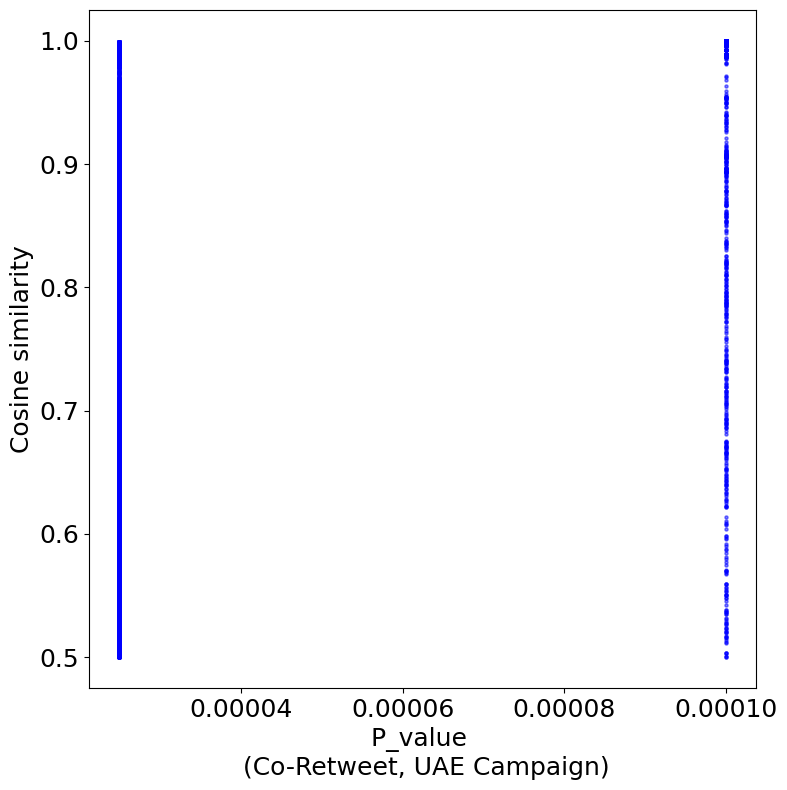

In [38]:
scatter_parameters =  {
        'data': df_edges_uae_coretweet,
        'fontsize': 18,
        'columns': {
            'x': 'pvalue',
            'y': 'weight',
        },
        'alpha': 0.5,
        'marker_size': 5,
        'marker': None,
        'xlabel': 'P_value \n (Co-Retweet, UAE Campaign)',
        'ylabel': 'Cosine similarity',
        # 'legend_location': '',
        'log_yscale': False,
        'log_xscale': False,
        'bins': None,
        # 'title': f'{year}_{campaign}_per_poster_per_tweet_1day',
        'save': {
            'path': f'./data',
            'filename': f'uae_pvalue_vs_cosine_coretweet.png'
        },
    }


scatter_plot(scatter_parameters)

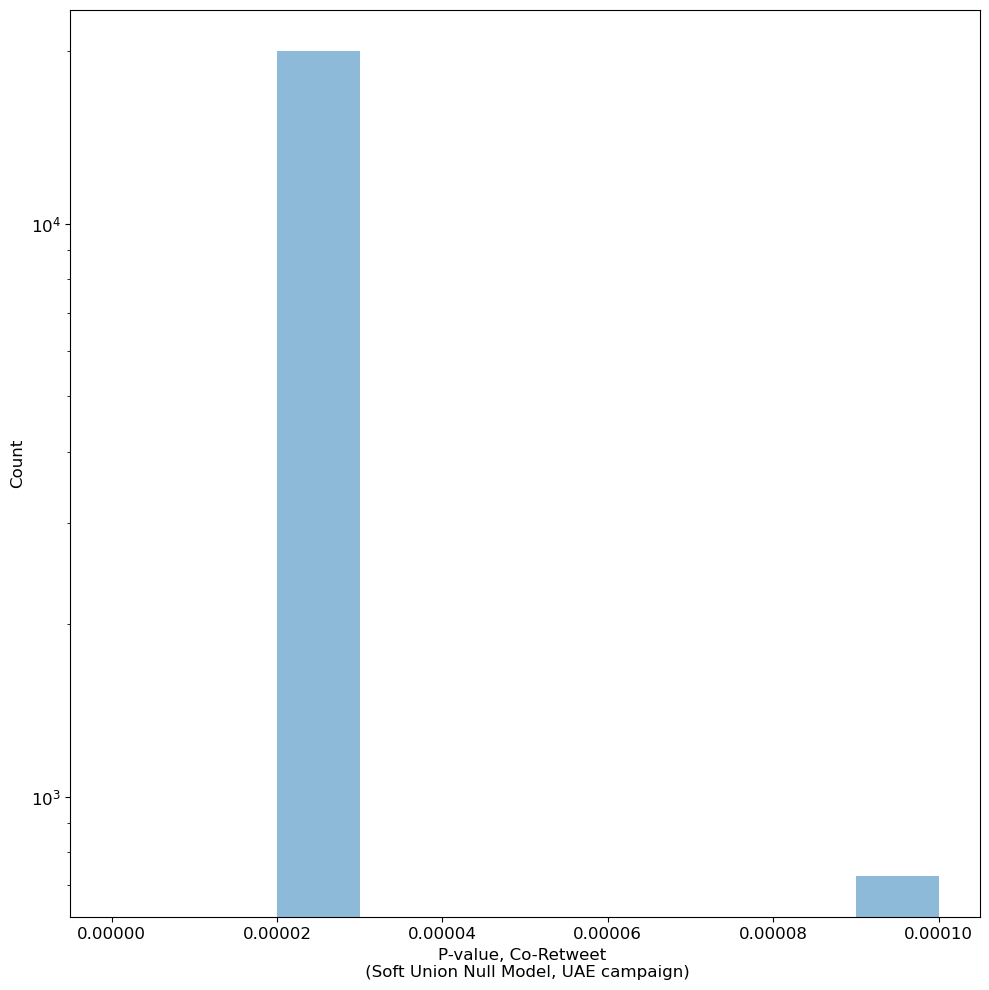

In [39]:
parameters =  {
        'data': None,
        'fontsize': 12,
        'columns': [
            {'column': '',
             'label': '',
            }
        ],
        'xlabel': f'P-value, {tag} \n (Soft Union Null Model, UAE campaign)',
        'ylabel': 'Count',
        # 'legend_location': '',
        'density': False,
        'log_yscale': True,
        'log_xscale': False,
        'bins': None,
        'save': {
            'path': './plots',
            'filename': ''
        },
        'title': ''
    }

parameters['data'] = [df_edges_uae_coretweet]
parameters['columns'][0]['column'] = 'pvalue'
# max(df_edges_uae_cohashtag['pvalue'])+0.0001
# print(parameters['data'][0][parameters['columns'][0]['column']])
parameters['bins'] = np.arange(0,
                               df_edges_uae_coretweet['pvalue'].max()+0.00001,
                               0.00001
                              ).tolist()
parameters['save']['filename'] = f'uae_coretweet_edges.png'

plot_histogram(parameters)

#### **UAE: CoWord**

In [40]:
uae_coword = './data/uae_082019_1_tweets_softunion_null_manita_coword.xnet'
tag = 'Co-word'
G_xnet = load(uae_coword)
    
G = G_xnet.to_networkx()

for node, attrs in G.nodes(data=True):
    if '_igraph_index' in attrs:
        del attrs['_igraph_index']

for u, v, attrs in G.edges(data=True):
    if '_igraph_index' in attrs:
        del attrs['_igraph_index']
        
all_edges = []
for u, v, attrs in G.edges(data=True):
    # print(attrs)
    all_edges.append([u, v, attrs['weight'], attrs['pvalue']])

df_edges_uae_coword = pd.DataFrame(data = all_edges,
                                  columns = ['source', 'target', 'weight', 'pvalue']
                                 )

In [41]:
df_edges_uae_coword['pvalue'].max()

np.float64(1.0)

In [42]:
correlation, p_value = stats.pearsonr(df_edges_uae_coword['weight'], 
                                      df_edges_uae_coword['pvalue']
                                     )
print(correlation, p_value)

-0.01738478191343819 6.123628440125641e-10


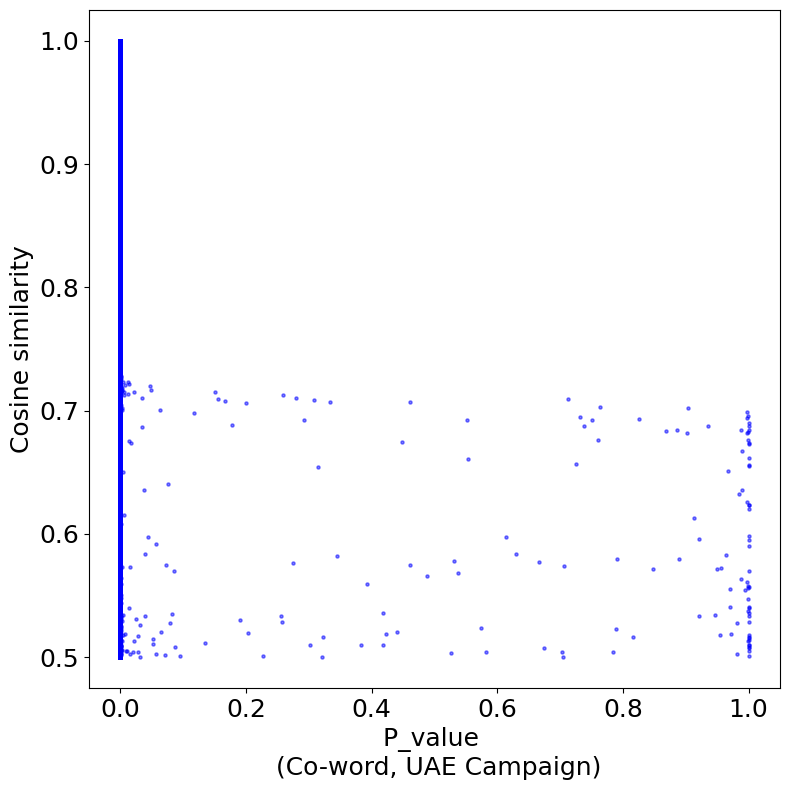

In [43]:
scatter_parameters =  {
        'data': df_edges_uae_coword,
        'fontsize': 18,
        'columns': {
            'x': 'pvalue',
            'y': 'weight',
        },
        'alpha': 0.5,
        'marker_size': 5,
        'marker': None,
        'xlabel': 'P_value \n (Co-word, UAE Campaign)',
        'ylabel': 'Cosine similarity',
        # 'legend_location': '',
        'log_yscale': False,
        'log_xscale': False,
        'bins': None,
        # 'title': f'{year}_{campaign}_per_poster_per_tweet_1day',
        'save': {
            'path': f'./data',
            'filename': f'uae_pvalue_vs_cosine_coword.png'
        },
    }

scatter_plot(scatter_parameters)

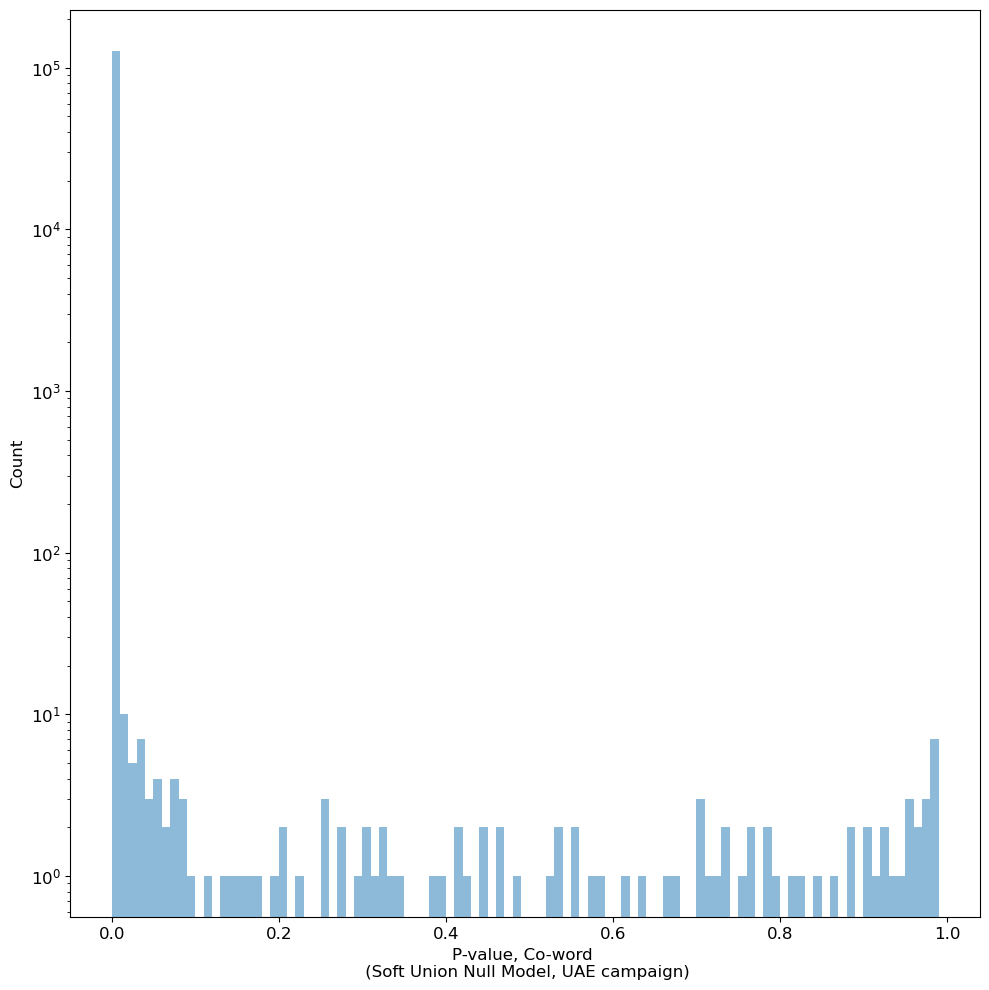

In [44]:
parameters =  {
        'data': None,
        'fontsize': 12,
        'columns': [
            {'column': '',
             'label': '',
            }
        ],
        'xlabel': f'P-value, {tag} \n (Soft Union Null Model, UAE campaign)',
        'ylabel': 'Count',
        # 'legend_location': '',
        'density': False,
        'log_yscale': True,
        'log_xscale': False,
        'bins': None,
        'save': {
            'path': './plots',
            'filename': ''
        },
        'title': ''
    }

parameters['data'] = [df_edges_uae_coword]
parameters['columns'][0]['column'] = 'pvalue'
# max(df_edges_uae_cohashtag['pvalue'])+0.0001
# print(parameters['data'][0][parameters['columns'][0]['column']])
parameters['bins'] = np.arange(0,
                               1,
                               0.01
                              ).tolist()
parameters['save']['filename'] = f'uae_coword_edges.png'

plot_histogram(parameters)

#### **UAE: Merged network Scatter plot**

In [45]:
df_uae.columns

Index(['source_id', 'target_id', 'pvalue', 'similarity', 'Type', 'weight'], dtype='object')

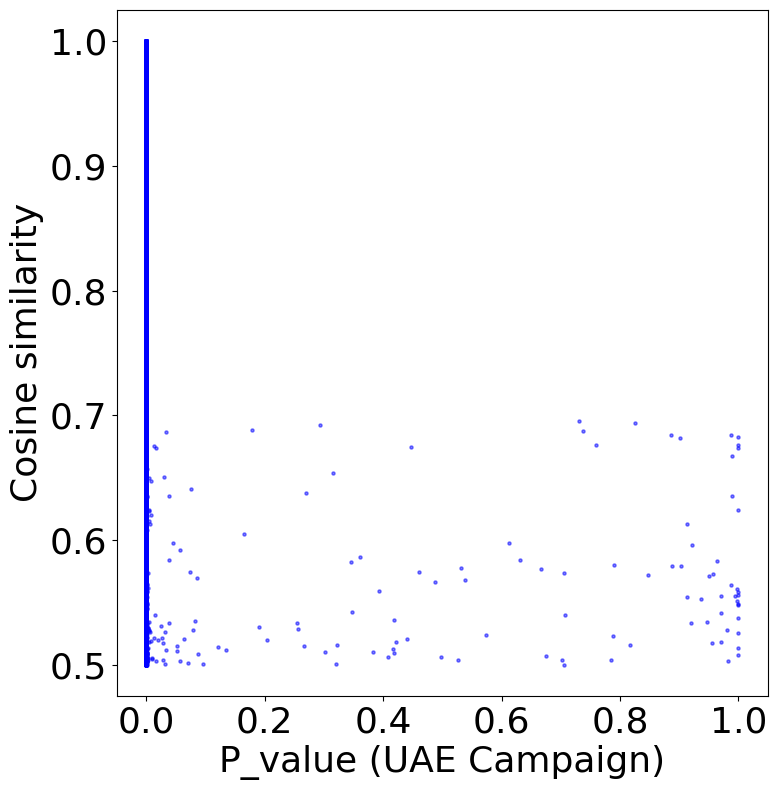

In [46]:
scatter_parameters =  {
        'data': df_uae,
        'fontsize': 26,
        'columns': {
            'x': 'pvalue',
            'y': 'similarity',
        },
        'alpha': 0.5,
        'marker_size': 5,
        'marker': None,
        'xlabel': 'P_value (UAE Campaign)',
        'ylabel': 'Cosine similarity',
        'log_yscale': False,
        'log_xscale': False,
        'bins': None,
        'save': {
            'path': f'./data',
            'filename': f'uae_pvalue_vs_cosine.png'
        },
    }


scatter_plot(scatter_parameters)

In [47]:
df_uae['1_pval'] = 1 - df_uae['pvalue']

In [48]:
correlation, p_value = stats.pearsonr(df_uae['similarity'], df_uae['1_pval'])

print(f"Pearson Correlation: {correlation:.4f}, p-value: {p_value:.4f}")


Pearson Correlation: 0.0158, p-value: 0.0000
